**Question:** Use bagging classifier and regressor, extra tree classifier and regressor, voting classifier and regressor and random forest classifier and regressor on top of Household consumption data and census data...



# **data link:**

https://archive.ics.uci.edu/ml/datasets/census+income



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/adult.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.shape

(32561, 15)

In [7]:
X = data.drop('income',axis=1)
y = data['income']

In [8]:
category_variable = [col for col in X.columns if X[col].dtypes == object]
numeric_variable = [col for col in X.columns if X[col].dtypes != object]

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [10]:
X[category_variable] = X[category_variable].apply(LabelEncoder().fit_transform)

In [11]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


In [12]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

# **Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
model.score(X_train,y_train)

1.0

[Text(0.7015008697405043, 0.9868421052631579, 'X[7] <= 0.5\ngini = 0.365\nsamples = 21815\nvalue = [16575, 5240]'),
 Text(0.45839273232865924, 0.9605263157894737, 'X[4] <= 12.5\ngini = 0.495\nsamples = 8818\nvalue = [4867, 3951]'),
 Text(0.2946235399028802, 0.9342105263157895, 'X[10] <= 5095.5\ngini = 0.443\nsamples = 6176\nvalue = [4135, 2041]'),
 Text(0.11518106121233572, 0.9078947368421053, 'X[4] <= 8.5\ngini = 0.416\nsamples = 5860\nvalue = [4129, 1731]'),
 Text(0.029828316263941754, 0.881578947368421, 'X[11] <= 1791.5\ngini = 0.171\nsamples = 1003\nvalue = [908, 95]'),
 Text(0.017562816631964247, 0.8552631578947368, 'X[0] <= 36.5\ngini = 0.163\nsamples = 984\nvalue = [896, 88]'),
 Text(0.0023871729241542114, 0.8289473684210527, 'X[2] <= 29563.0\ngini = 0.061\nsamples = 286\nvalue = [277, 9]'),
 Text(0.0008487725952548307, 0.8026315789473685, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.00042438629762741535, 0.7763157894736842, 'gini = 0.0\nsamples = 1\nvalue 

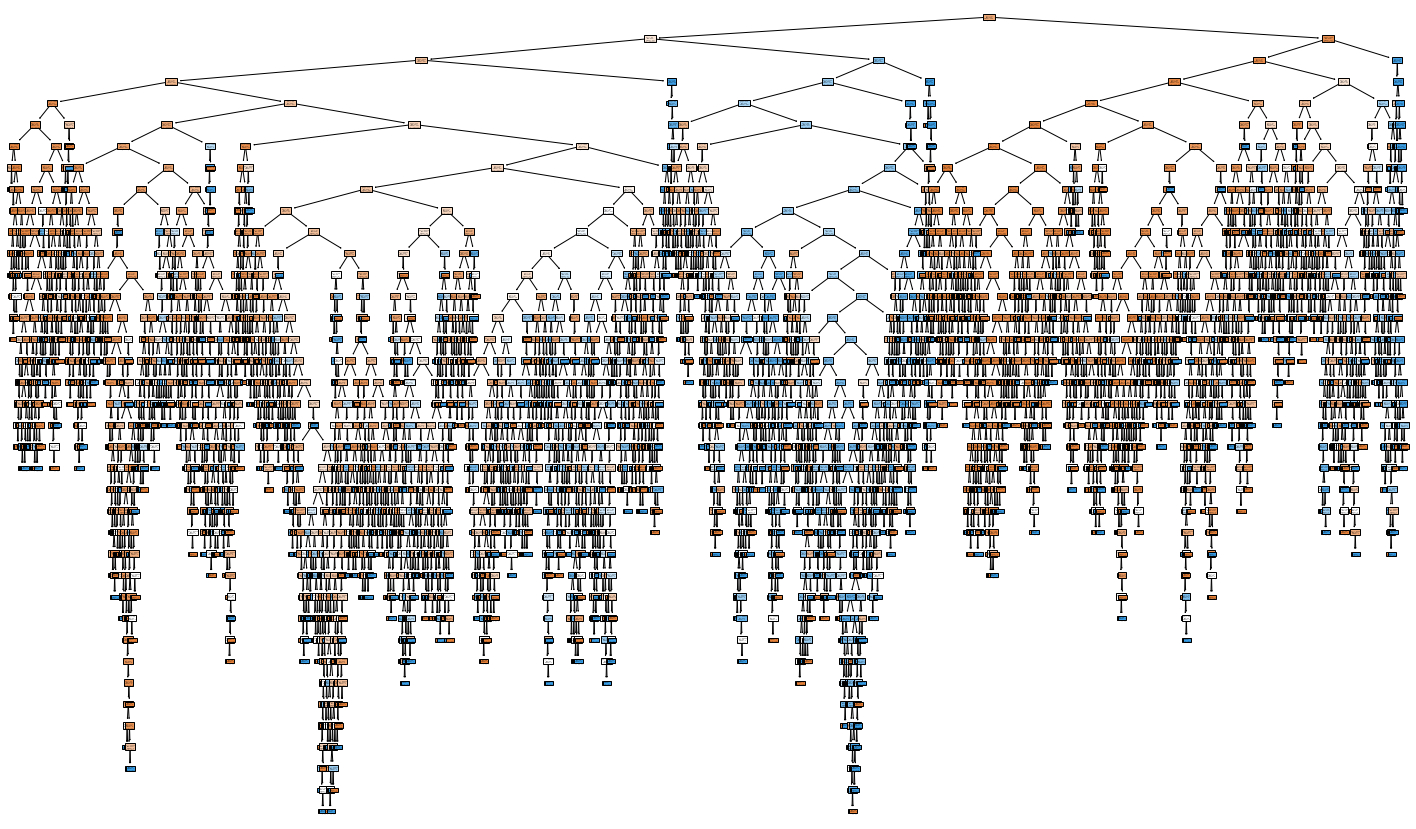

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [19]:
fig.savefig("decistion_tree_classifier.png")

In [20]:
y_predict=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_predict)

0.8091382840126559

In [23]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [25]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [26]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [27]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [28]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.57578125, 0.9285714285714286, 'X[12] <= 42.128\ngini = 0.365\nsamples = 21815\nvalue = [16575, 5240]'),
 Text(0.3125, 0.7857142857142857, 'X[4] <= 13.663\ngini = 0.287\nsamples = 15549\nvalue = [12849, 2700]'),
 Text(0.18125, 0.6428571428571429, 'X[5] <= 3.519\ngini = 0.258\nsamples = 14610\nvalue = [12386, 2224]'),
 Text(0.1, 0.5, 'X[3] <= 5.076\ngini = 0.386\nsamples = 7985\nvalue = [5896, 2089]'),
 Text(0.05, 0.35714285714285715, 'X[5] <= 0.162\ngini = 0.143\nsamples = 1017\nvalue = [938, 79]'),
 Text(0.025, 0.21428571428571427, 'X[8] <= 0.31\ngini = 0.028\nsamples = 210\nvalue = [207, 3]'),
 Text(0.0125, 0.07142857142857142, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.0375, 0.07142857142857142, 'gini = 0.019\nsamples = 205\nvalue = [203, 2]'),
 Text(0.075, 0.21428571428571427, 'X[3] <= 2.04\ngini = 0.171\nsamples = 807\nvalue = [731, 76]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.209\nsamples = 472\nvalue = [416, 56]'),
 Text(0.0875, 0.07142857142857142, 'gini

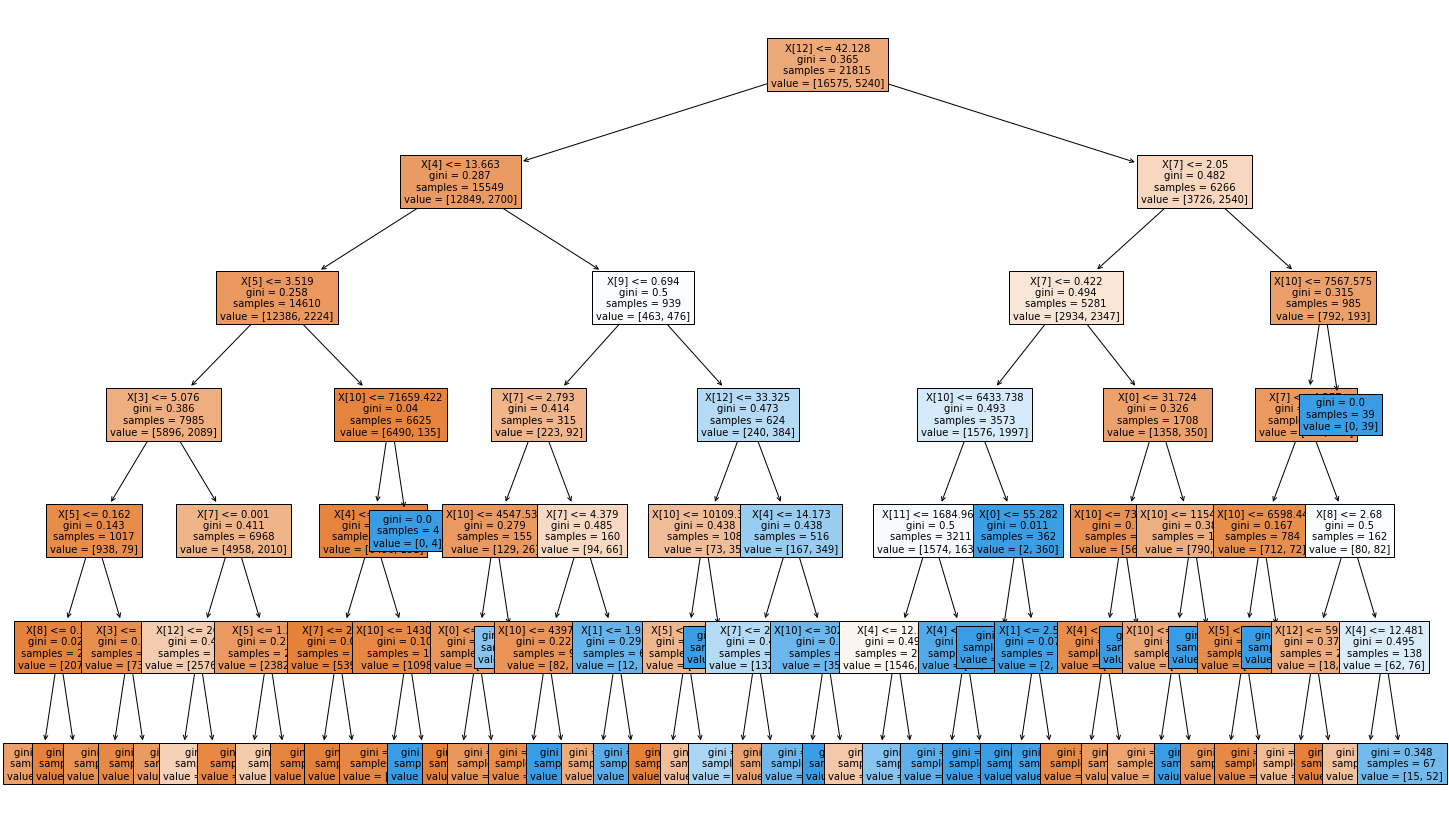

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [30]:
y_prediction2=model_with_best_params.predict(X_test)

In [31]:
accuracy_score(y_test,y_prediction2)

0.819746882560953

# **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()

In [33]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred_rf=Rf_model.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred_rf)

0.8564116880699796

In [36]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_searh.best_params_

In [ ]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [ ]:
Rf_model_with_best_params.fit(X_train,y_train)

In [ ]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_rf_bp)

# **Bagging Classifier**

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0)

In [ ]:
model_bagging_svc.fit(X_train,y_train)

In [ ]:
y_pred_bagging = model_bagging_svc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_bagging)

# **Voting Classifier**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [44]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())])

In [45]:
y_pred_voting=eclf1.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_voting)

0.8108133258887028

# **Extra Tree Classifier**

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
Et_model = ExtraTreesClassifier()

In [48]:
Et_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [49]:
y_pred_et = Et_model.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_et)

0.8432905267076122

In [51]:
grid_param = {
    'n_estimators':[90,100],
    'criterion':['gini','entropy'],
    'max_depth': range(2,12,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['sqrt', 'log2']
}

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search_bestparam_et = GridSearchCV(estimator=Et_model,param_grid=grid_param,cv=3)

In [ ]:
grid_search_bestparam_et.fit(X_train,y_train)

In [ ]:
grid_search_bestparam_et.best_params_

In [ ]:
Et_model_best_param = ExtraTreesClassifier(criterion='gini',max_depth=11,max_features='sqrt',min_samples_leaf= 1,min_samples_split=8,n_estimators=90)

In [ ]:
Et_model_best_param.fit(X_train,y_train)

In [ ]:
y_pred_et_bp = Et_model_best_param.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_et_bp)